## Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.


## Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:

• Country code

• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

• Restaurant Id: Unique id of every restaurant across various cities of the world

• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurant's location
• Latitude: Latitude coordinate of the restaurant's location

• Cuisines: Cuisines offered by the restaurant 

• Average Cost for two: Cost for two people in different currencies 

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no

• Price range: range of price of food

• Aggregate Rating: Average rating out of 5

• Rating color: depending upon the average rating color

• Rating text: text on the basis of rating of rating

• Votes: Number of ratings casted by people


## Problem statement : 

In this dataset predict 2 things –

1) Average Cost for two

2) Price range


## Dataset Link-  

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Z_Restaurant/Country-Code.xlsx

•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Z_Restaurant/zomato.csv


In [67]:
#importing libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## LOADING THE DATASET

In [68]:
#loading the dataset - using Encoding Formatter to avoid UnicodeDecodeError

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv",encoding="latin-1") 

In [69]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [70]:
#displaying all columns in our dataset

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [71]:
df.shape

(9551, 21)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [73]:
# This will check if any duplicate Value
df.duplicated().sum() 

0

In [74]:
#check if any whitespace, 'NA' or '-' exist in dataset.
df.isin([' ','NA','-']).sum().any()

False

## MISSING VALUES

In [75]:
#finding missing values in our dataset

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

- 'Cuisines' column has 9 missing values

In [76]:
# Fill nulls with Cuisines column Mode.
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])

<Axes: >

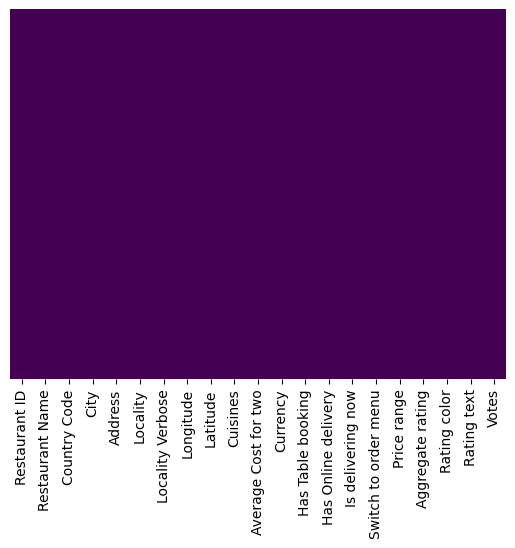

In [77]:
#finding missing values using heatmap

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- no null values remaining

## MERGING 2 FILES

In [78]:
df1=pd.read_excel(r"C:\Users\Acer\Downloads\Country-Code.xlsx")
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [79]:
data=df.merge(df1,how="left",on="Country Code")

In [80]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


## Comment :
- Our final dataset has the 'Country' column added at the end of our new dataset(which is the additonal column) that has been added from excel to our dataset. Creating the final dataset

In [81]:
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

## Exploratory Data Analysis

### Univariate Analysis

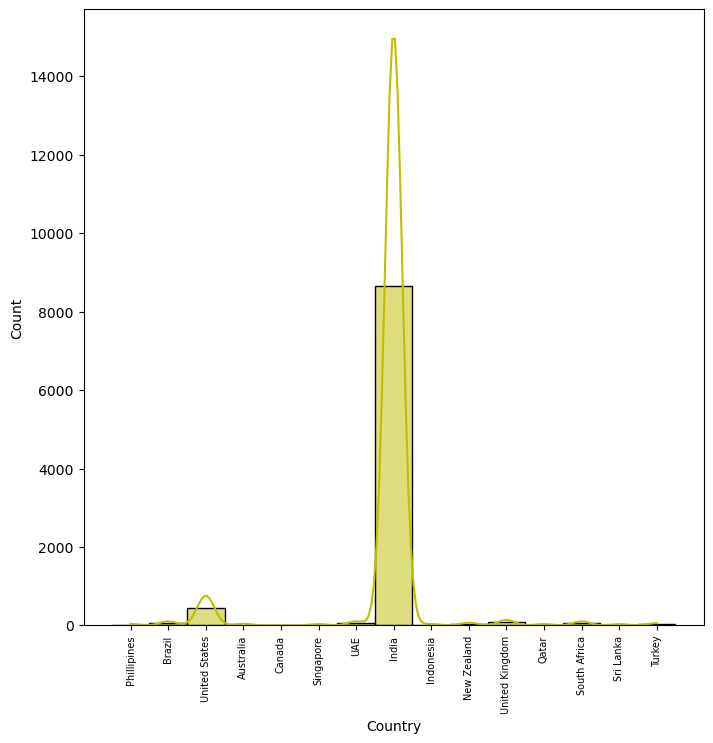

In [82]:
plt.figure(figsize=(8,8))
sns.histplot(data['Country'],kde=True,color='y')
plt.xticks( fontsize=7,rotation=90)
plt.show()

## Comment :
-  The top 3 countries with maximum number of orders are India (with maximum), USA and then UK.

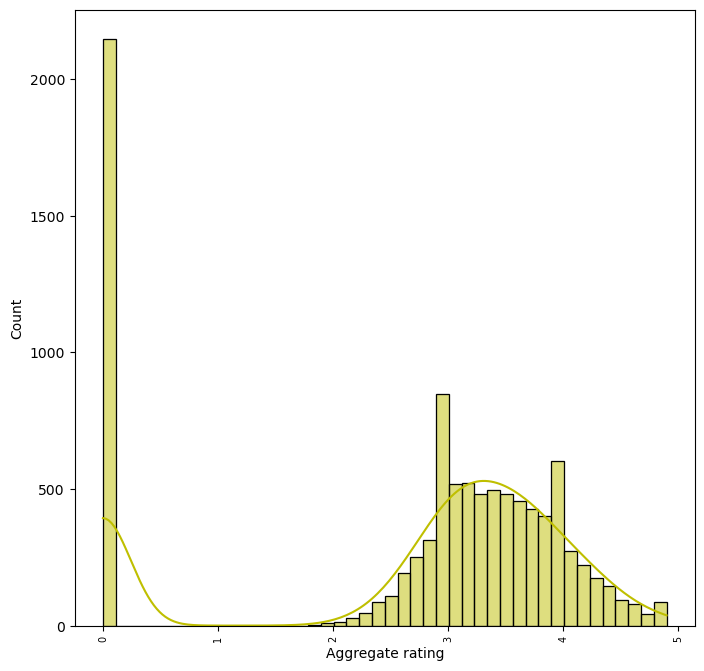

In [83]:
plt.figure(figsize=(8,8))
sns.histplot(data['Aggregate rating'],kde=True,color='y')
plt.xticks( fontsize=7,rotation=90)
plt.show()

## Comment :
- Most of the people did not give ratings
- Max count of ratings is between 3 to 4

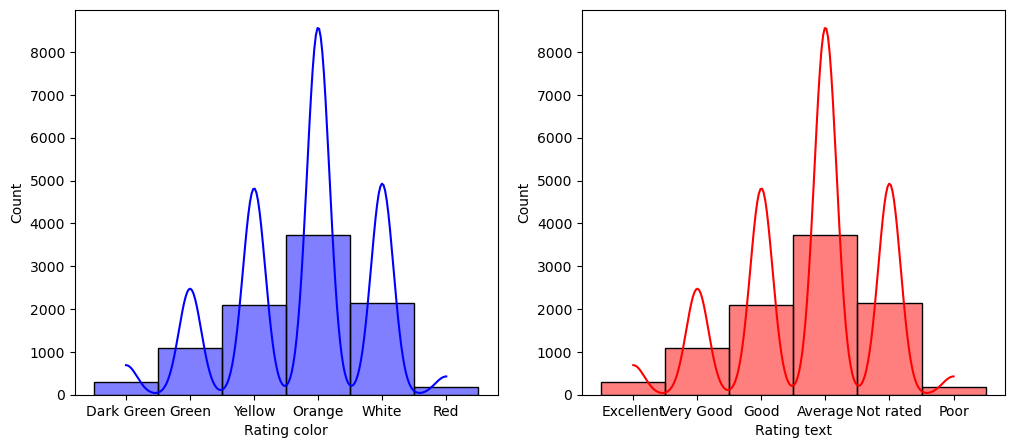

In [84]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Rating color'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Rating text'],kde=True,color='r')
plt.show()

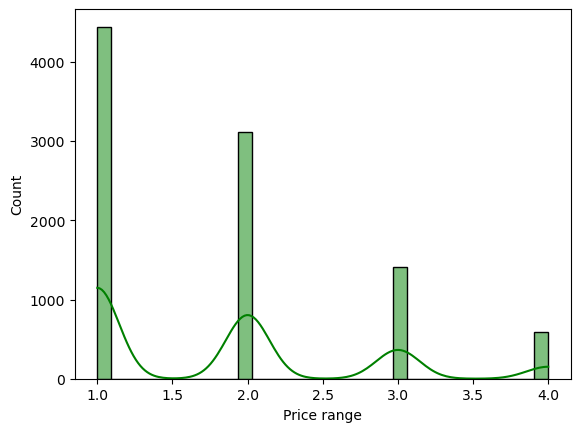

In [85]:
sns.histplot(df['Price range'],kde=True,color='g')
plt.show()

### Bivariate Analysis

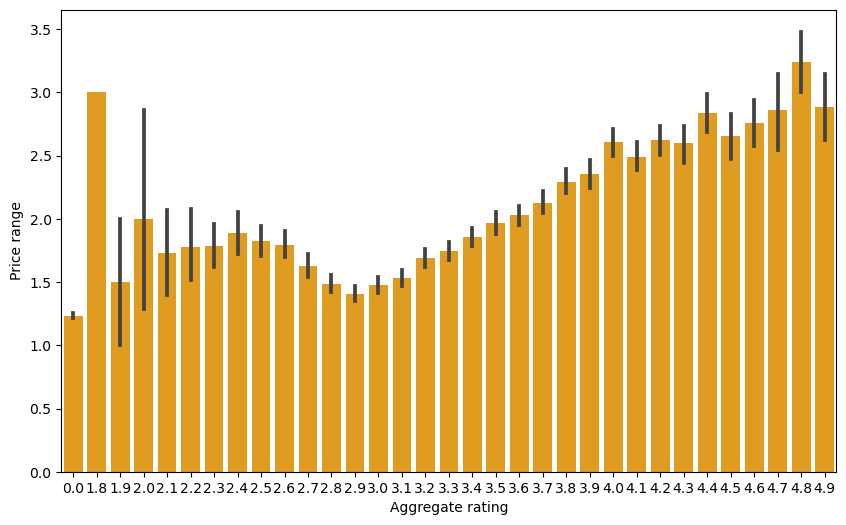

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df,x='Aggregate rating', y='Price range',color='orange')
plt.show()

## Label Endoding

In [87]:
pd.set_option('display.max_columns', None)
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [88]:
object_columns = data.select_dtypes(include=['object'])

In [89]:
object_column_names = object_columns.columns.tolist()
object_column_names

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text',
 'Country']

In [90]:
data['Restaurant ID'].value_counts()

Restaurant ID
6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: count, Length: 9551, dtype: int64

In [91]:
data['Locality'].value_counts()

Locality
Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                                  86
Malviya Nagar                                   85
                                              ... 
Lemon Tree Premier, Sector 29                    1
Omaxe Celebration Mall, Sohna Road, Gurgaon      1
Park Inn, Sector 15, Gurgaon                     1
Plaza Mall, MG Road                              1
Moda                                             1
Name: count, Length: 1208, dtype: int64

In [92]:
data['Cuisines'].value_counts()

Cuisines
North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [93]:
data['Locality Verbose'].value_counts()

Locality Verbose
Connaught Place, New Delhi                    122
Rajouri Garden, New Delhi                      99
Shahdara, New Delhi                            87
Defence Colony, New Delhi                      86
Pitampura, New Delhi                           85
                                             ... 
Ramada Gurgaon Central, Sector 44, Gurgaon      1
Sector 5, Gurgaon                               1
Sector 53, Gurgaon                              1
The Claremont, MG Road, Gurgaon                 1
Moda, ÛÁstanbul                                 1
Name: count, Length: 1265, dtype: int64

In [94]:
data['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [95]:
data['Currency'].value_counts()

Currency
Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: count, dtype: int64

In [96]:
data['Has Table booking'].value_counts()

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

In [97]:
data['Has Online delivery'].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [98]:
data['Is delivering now'].value_counts()

Is delivering now
No     9517
Yes      34
Name: count, dtype: int64

In [99]:
data['Switch to order menu'].value_counts()

Switch to order menu
No    9551
Name: count, dtype: int64

In [100]:
data['Country'].value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [101]:
# columns having unique value needs to dropped as they are no longer useful for model training.
data.drop(columns=['Switch to order menu','Restaurant ID'],axis=1,inplace=True)

In [102]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_columns = ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 
                       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 
                       'Is delivering now', 'Rating color', 'Rating text','Country']

# Apply label encoding to each categorical column
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

In [103]:
data.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749,162,73,8685,171,172,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314,6
1,3173,162,73,6055,593,601,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591,6
2,2897,162,75,4684,308,314,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270,6
3,4707,162,75,8690,862,875,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365,6
4,5523,162,75,8689,862,875,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,1,229,6


## Statistical Analysis

In [104]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant Name,9551.0,3653.204586,2142.917876,0.000000,1777.500000,3595.000000,5485.500000,7445.000000
Country Code,9551.0,18.365616,56.750546,1.000000,1.000000,1.000000,1.000000,216.000000
City,9551.0,78.301434,23.198915,0.000000,76.000000,88.000000,88.000000,140.000000
Address,9551.0,4542.439430,2565.717005,0.000000,2323.500000,4610.000000,6746.500000,8917.000000
Locality,9551.0,658.128468,315.866515,0.000000,381.000000,696.000000,921.000000,1207.000000
Locality Verbose,9551.0,677.304994,331.727449,0.000000,387.000000,707.000000,953.000000,1264.000000
Longitude,9551.0,64.126574,41.467058,-157.948486,77.081343,77.191964,77.282006,174.832089
Latitude,9551.0,25.854381,11.007935,-41.330428,28.478713,28.570469,28.642758,55.976980
Cuisines,9551.0,989.461732,514.176108,0.000000,497.000000,1127.000000,1353.500000,1824.000000
Average Cost for two,9551.0,1199.210763,16121.183073,0.000000,250.000000,400.000000,700.000000,800000.000000


## Correlation Between Datasets

<Axes: >

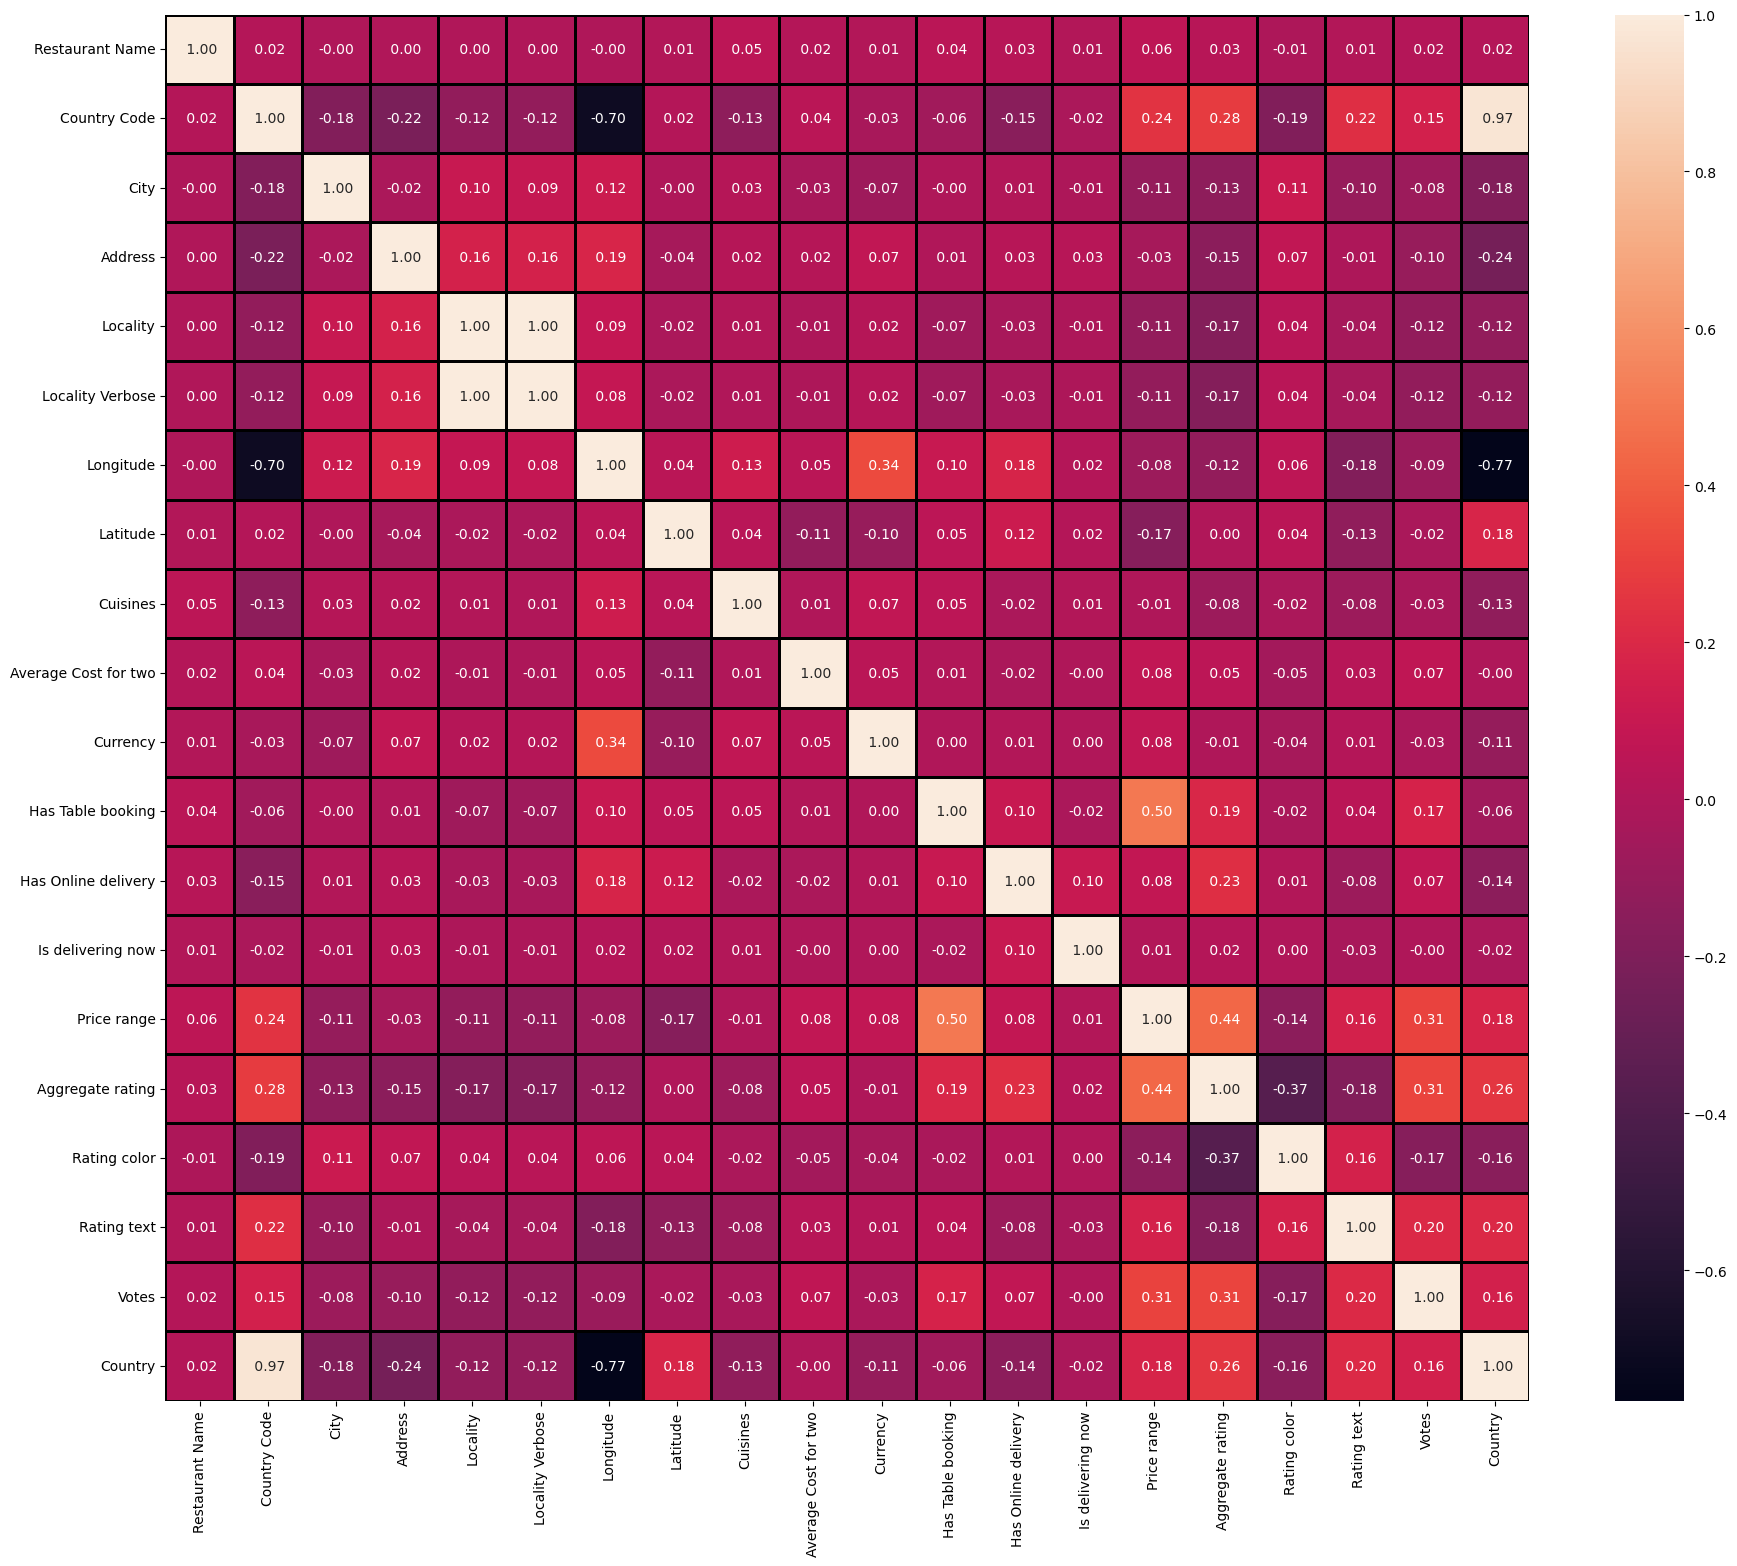

In [105]:
plt.figure(figsize=(22,18))
sns.heatmap(data.corr(),annot=True,linewidths=1,linecolor='black',fmt=' .2f' )

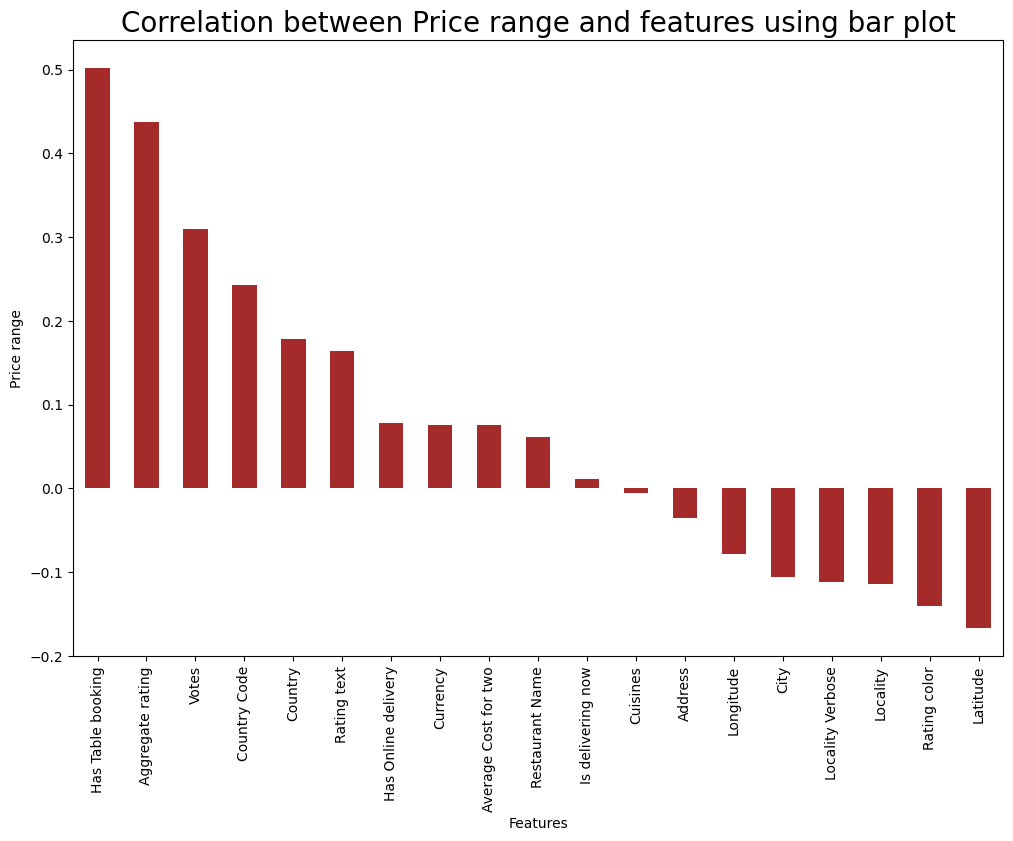

In [106]:
plt.figure(figsize=(12,8))
data.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar',color='brown')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Price range',fontsize=10)
plt.title('Correlation between Price range and features using bar plot',fontsize=20)
plt.show()

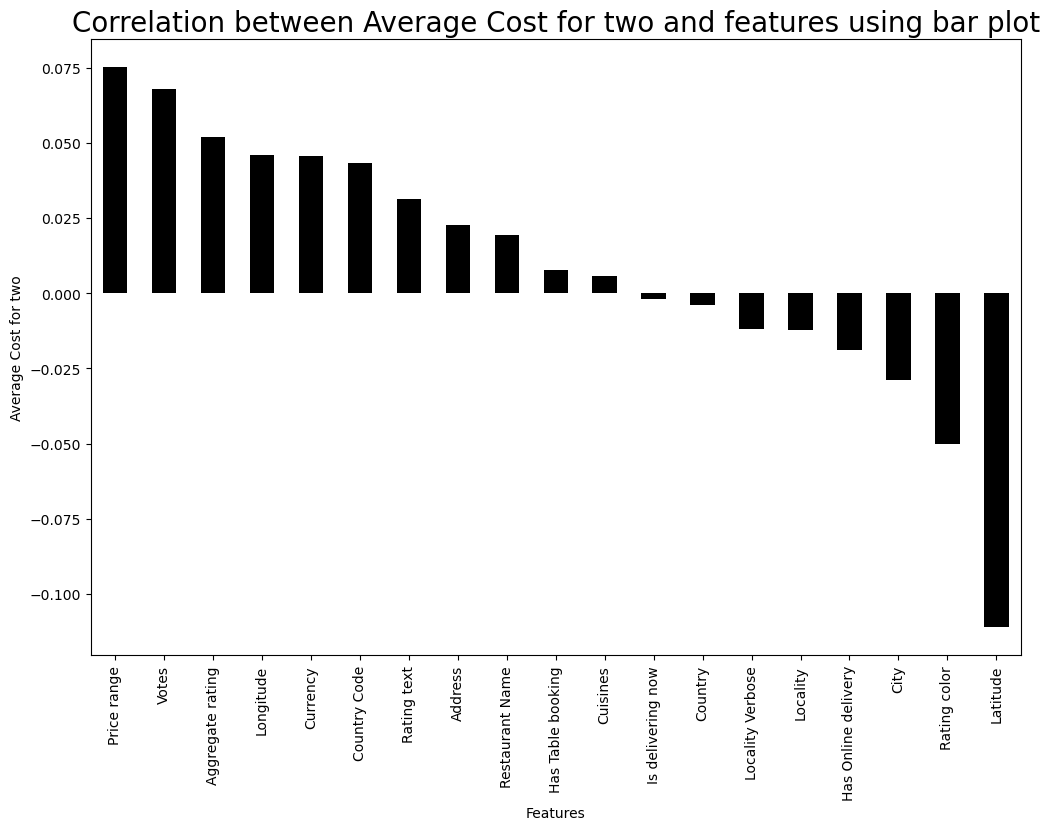

In [107]:
plt.figure(figsize=(12,8))
data.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar',color='k')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Average Cost for two',fontsize=10)
plt.title('Correlation between Average Cost for two and features using bar plot',fontsize=20)
plt.show()

## Outlier Detection

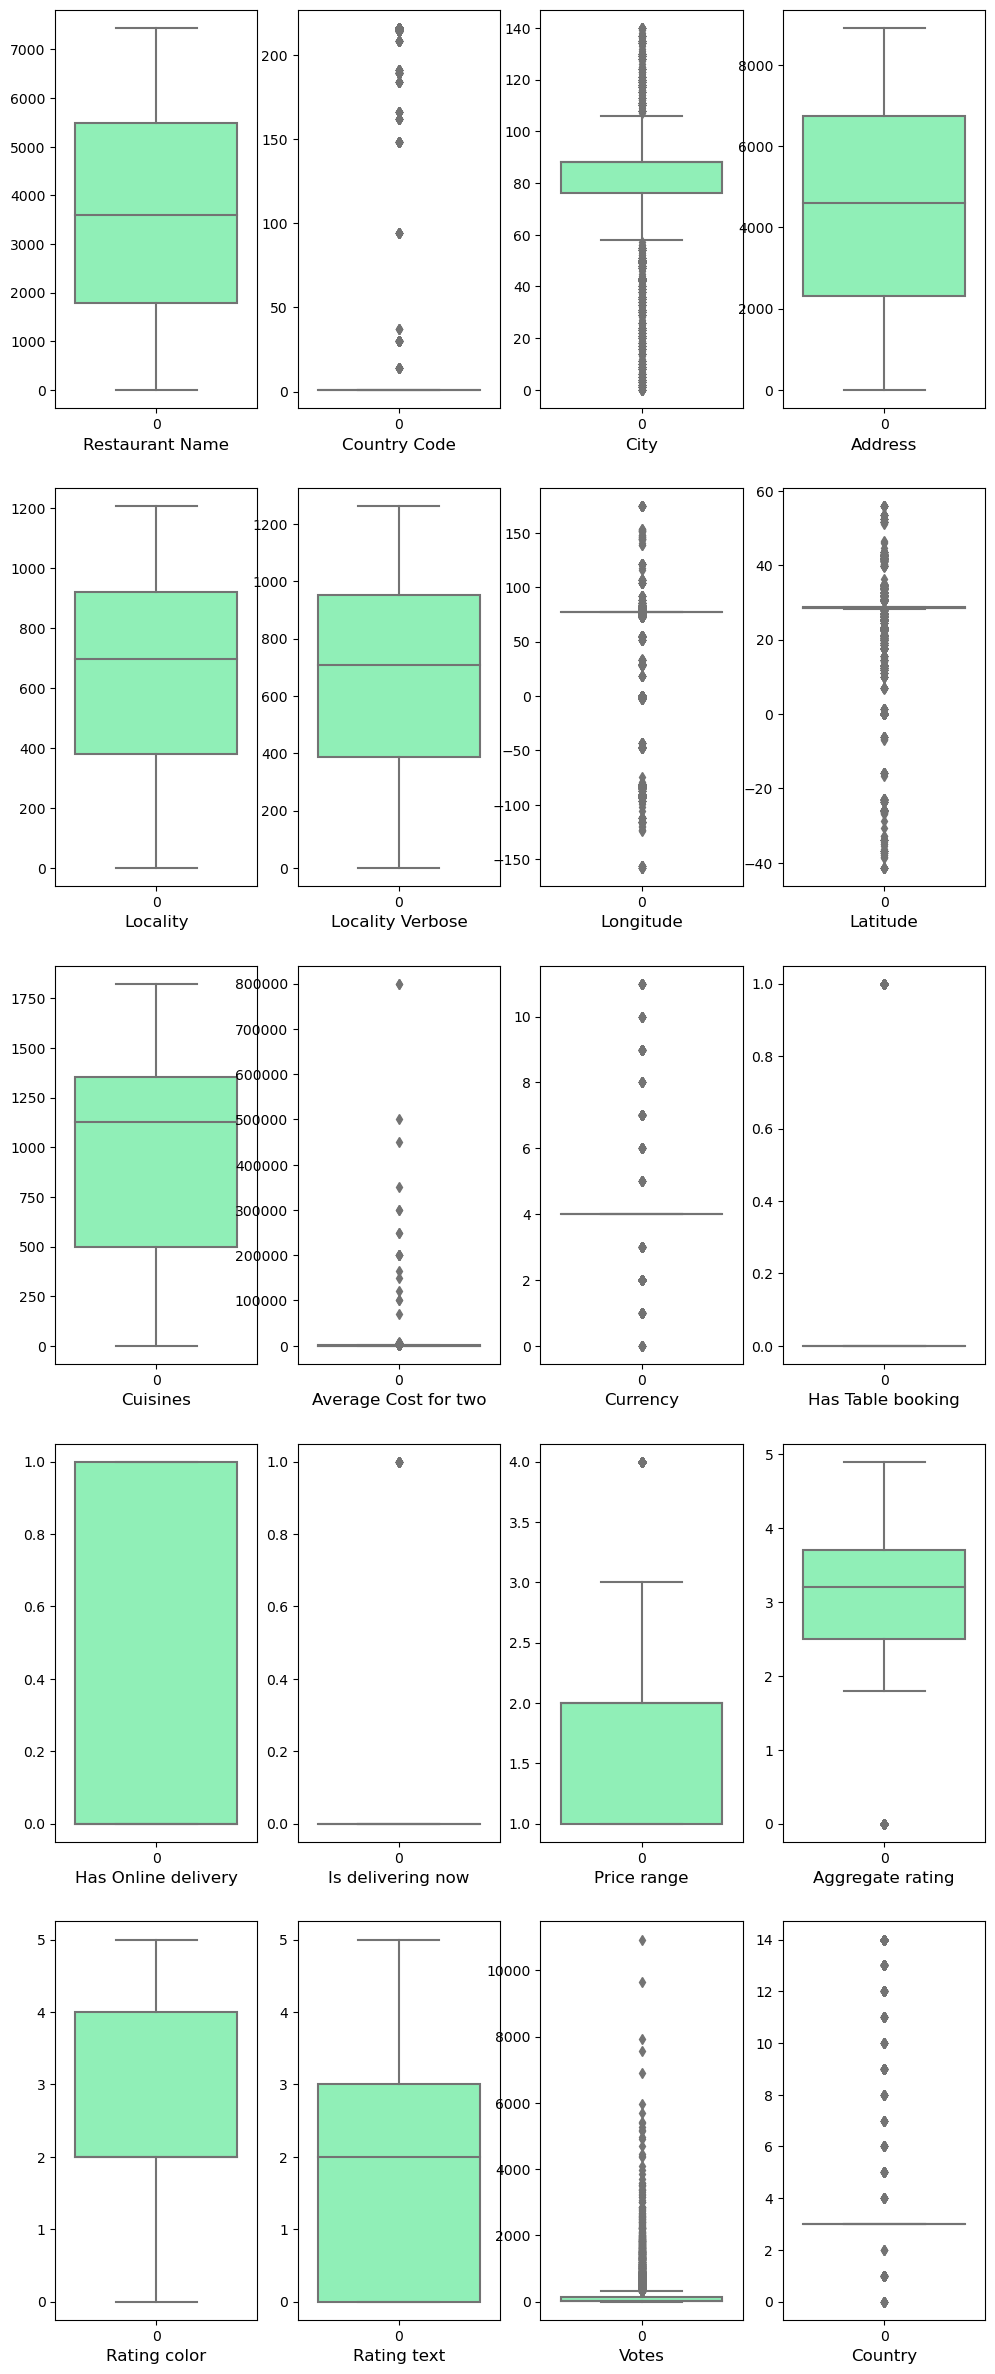

In [108]:
plt.figure(figsize=(12,30))
index=1
for column in data:
    if index <=20:
        ax = plt.subplot(5,4,index)
        sns.boxplot(data[column], palette='rainbow')
        plt.xlabel(column,fontsize=12)
    index+=1
plt.show()

## Outlier Removal

In [109]:
from scipy.stats import zscore

# Specify the columns to remove outliers
columns_to_remove_outliers = [ 'Country Code', 'City','Longitude', 'Latitude', 'Currency', 'Has Table booking',
    'Has Online delivery', 'Is delivering now','Votes','Country']

# Calculate z-scores for each specified column
z_scores = data[columns_to_remove_outliers].apply(zscore)

# Set a threshold for z-scores 
threshold = 3

# Remove rows with z-scores beyond the threshold in any specified column
df2 = data[(z_scores.abs() < threshold).all(axis=1)]

## Checking Skewness Of Dataset

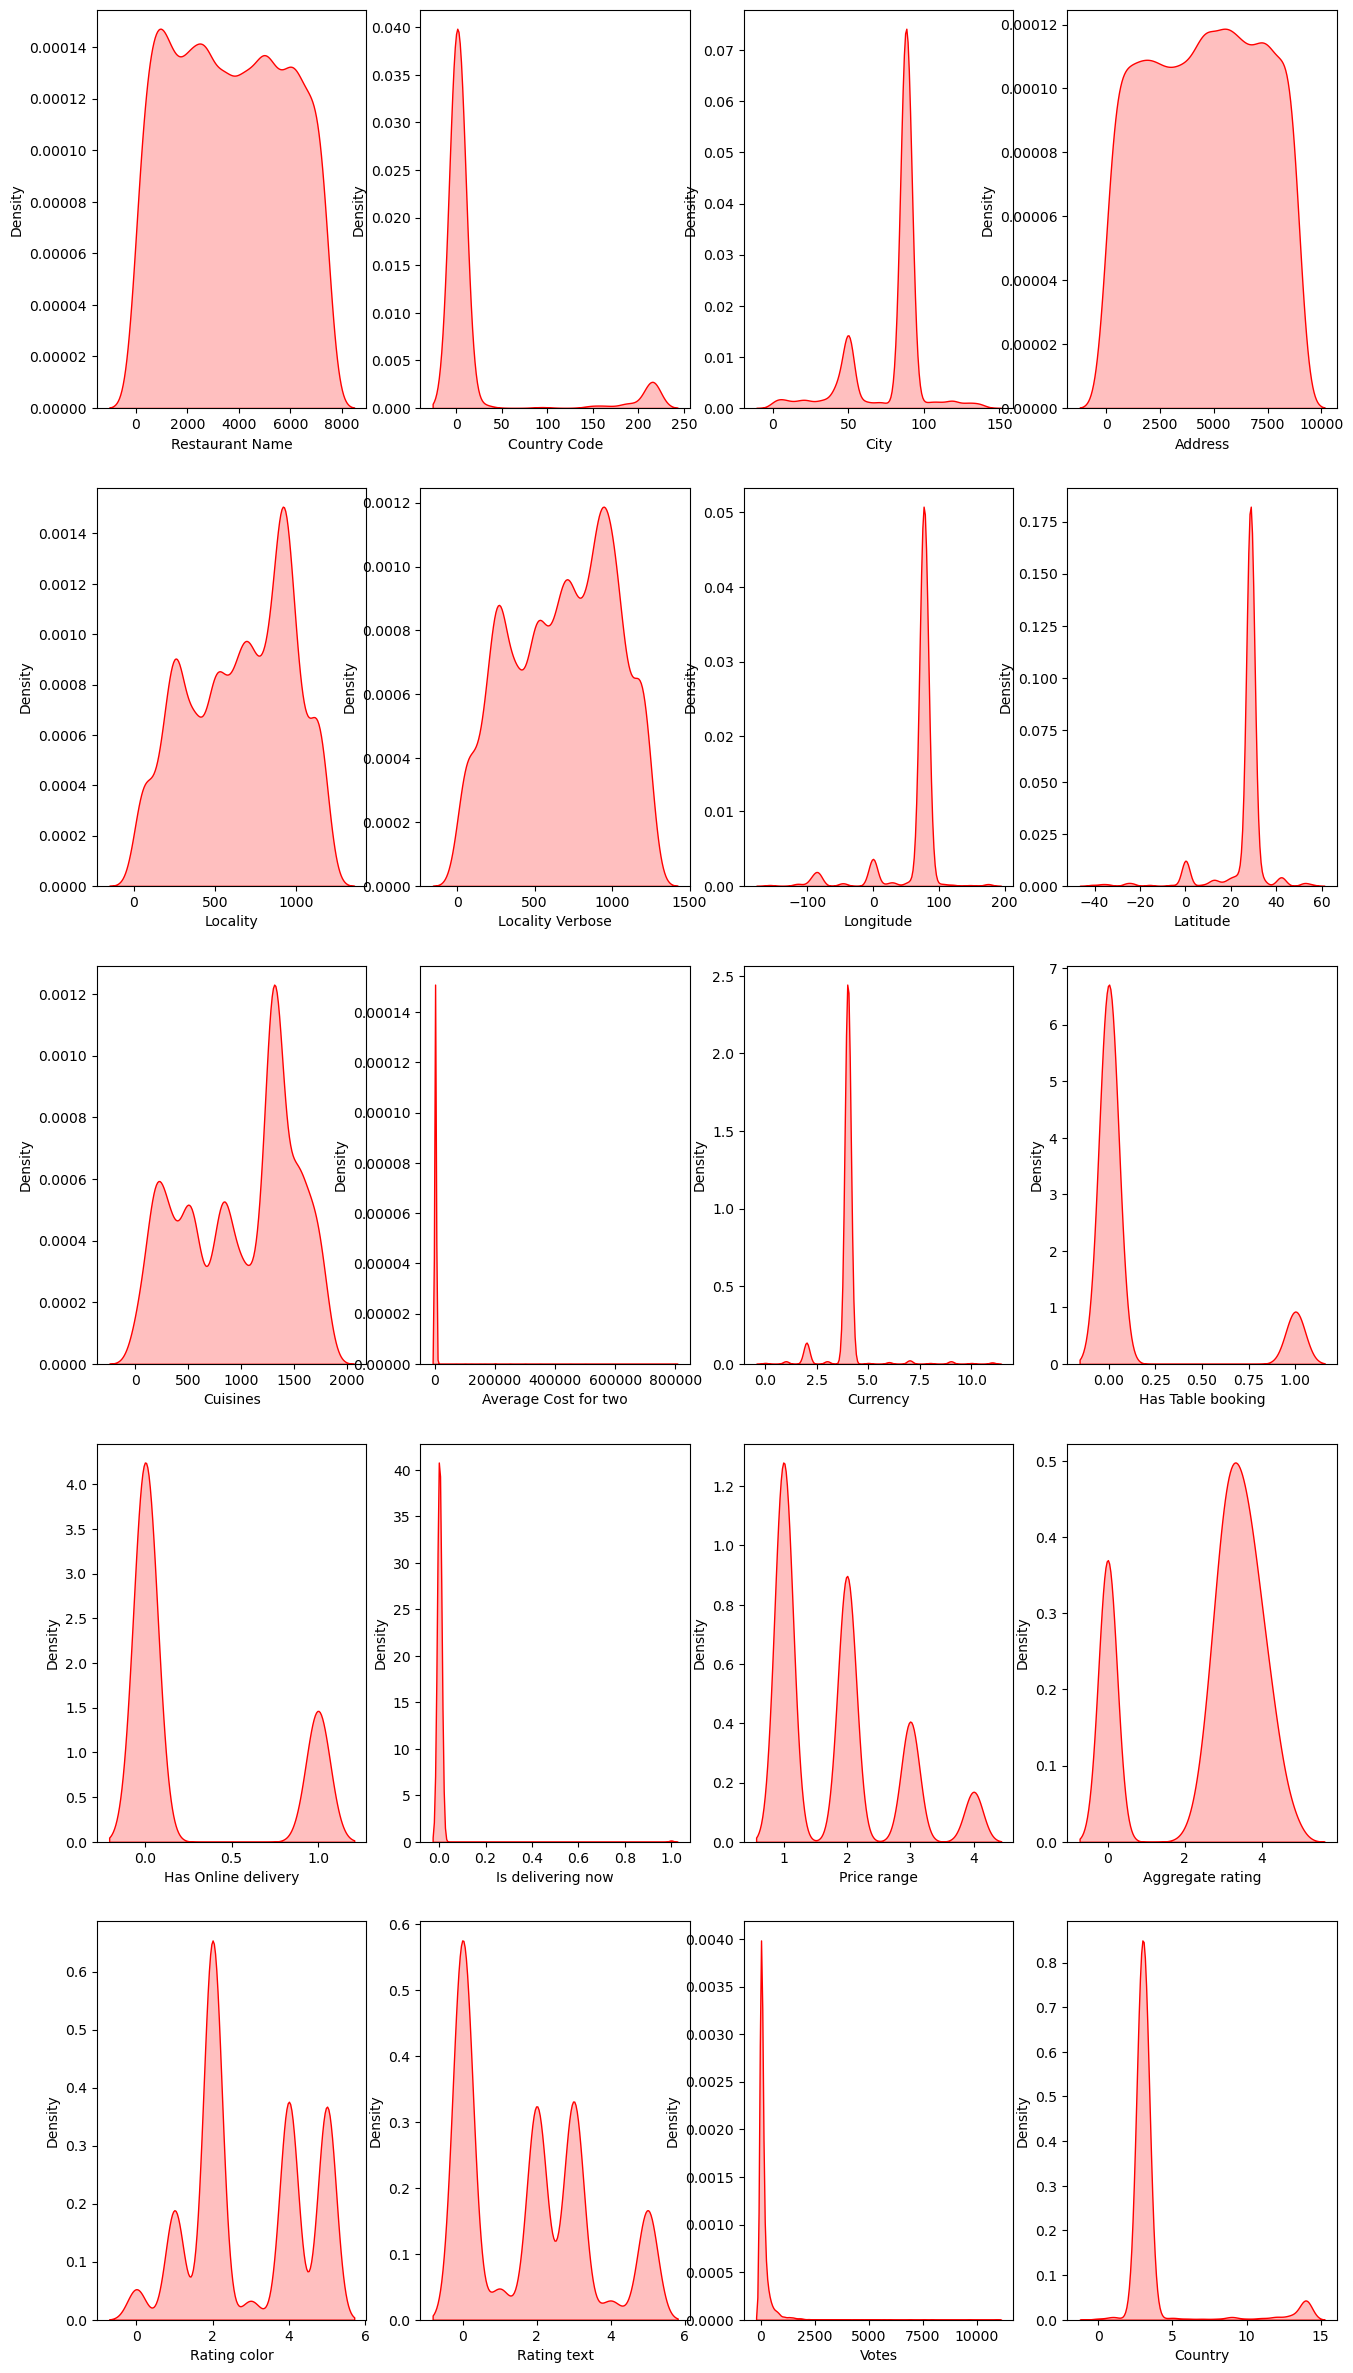

In [110]:
plt.figure(figsize=(16,30))
plotnumber=1
for column in data:
    if plotnumber <=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(data[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [111]:
data.skew()

Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

## Comment -

- [ 'Country Code', 'Cuisines','Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Votes','Country'] these columns are right skewed.
- ['City', 'Longitude', 'Latitude','Aggregate rating'] these columns are left skewed.

## Removing Skewness

In [112]:
# columns with right-skewed data containing zeros
right_skewed_columns =  [ 'Country Code', 'Cuisines','Average Cost for two', 'Currency', 'Has Table booking',
                         'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Votes','Country']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
data[right_skewed_columns] = scaler.fit_transform(data[right_skewed_columns].values)

In [113]:
from scipy.stats import boxcox

# Columns with left-skewed data containing zeros
left_skewed_columns = ['City', 'Longitude', 'Latitude', 'Aggregate rating']

# Add a small constant to ensure all data points are positive
data[left_skewed_columns] += abs(data[left_skewed_columns].min()) + 1

# Apply Box-Cox transformation
data[left_skewed_columns] = data[left_skewed_columns].apply(lambda x: boxcox(x)[0])

In [114]:
data.skew()

Restaurant Name          0.044637
Country Code             2.780362
City                    -0.203048
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude                0.556129
Latitude                 0.399812
Cuisines                -0.383190
Average Cost for two     0.142365
Currency                 0.448602
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.610806
Rating color            -0.103780
Rating text             -0.059959
Votes                   -0.004029
Country                 -1.341627
dtype: float64

## Spliting data into Feature and Target variable

In [115]:
feature_columns=['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
        'Currency', 'Has Table booking','Has Online delivery', 'Is delivering now', 
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes','Country']
label_columns=['Average Cost for two']
labelcolumn=['Price range']

In [116]:
X = data[feature_columns]
Y = data[labelcolumn]
y = data[label_columns]

## Standard Scaling

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## variance_inflation_factor

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns

In [119]:
vif

,VIF,Features
0,1.006806,Restaurant Name
1,2.107458,Country Code
2,1.053256,City
3,1.105101,Address
4,953.409337,Locality
5,952.457959,Locality Verbose
6,1.497327,Longitude
7,1.272730,Latitude
8,1.046842,Cuisines
9,1.203092,Currency


## Comment 
- 1 < VIF < 5: Moderate multicollinearity. The variance of the coefficient is moderately inflated.
- VIF > 5: High multicollinearity.

## Machine learning Model 'Average Cost for two'

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score

In [121]:
# Spliting the data for training & testing.
for i in range(0,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.3)

## DecisionTreeRegressor

In [122]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
maxAccu1=0
maxRS1=0
for i in range(0,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=i)
    dtr.fit(X_train,Y_train)
    Y_pred1=dtr.predict(X_test)
    acc1=r2_score(Y_test,Y_pred1)
    if acc1>maxAccu1:
        maxAccu1=acc1
        maxRS11=i
print('Best accuracy is', maxAccu1*100 ,'on Random_state', maxRS1)

Best accuracy is 34.0871688647334 on Random_state 0


## RandomForestRegressor

In [123]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

pred2 = rfr.predict(X_test)
R3 = r2_score(Y_test, pred2)

print("R-squared:", R3*100)

R-squared: 64.45912193944507


## LinearRegression

In [124]:
from sklearn.linear_model import LinearRegression
rf=LinearRegression()
rf.fit(X_train,Y_train)
pred3=rf.predict(X_test)
R4=r2_score(Y_test,pred3)
print("R-squared:", R4*100)

R-squared: 51.41233674528534


## ExtraTreesRegressor

In [125]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(X_train, Y_train)

pred5 = etr.predict(X_test)

# Evaluate the model using regression metrics
R6 = r2_score(Y_test, pred5)

print("R-squared:", R6*100)

R-squared: 61.16808814073633


## Cross Validation

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [127]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    Y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,Y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,Y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,Y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,Y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.40294610151753013
Mean squared error : 0.2867713762428048
Root Mean Squared Error: 0.5355103885479765


 R2 Score :
0.6459595870849704


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.42742543171114594
Mean squared error : 0.31177964416535847
Root Mean Squared Error: 0.5583723167970978


 R2 Score :
0.6150850360136875


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.47095761381475665
Mean squared error : 0.6007326007326007
Root Mean Squared Error: 0.775069416718658


 R2 Score :
0.2583513012999815


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.5287125751559537
Mean squared error : 0.4119114069021633
Root Mean Squared Error: 0.6418032462539928


 R2 Score :
0.49146499035322855


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.4301098173377337
Mean squared error : 0.30511243413753936
Root Mean Squared Error: 0.5523698345651574


 R2 Score :
0.6233161984894072


 Error of 

## Hyper Parameter Tuning

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
parameter =  {
    'n_estimators': [100], 
    'max_depth': [ 10],      
    'min_samples_split': [2,3],  
    'min_samples_leaf': [1,2]    
}

In [130]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose =5)

In [131]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.613 total time=  18.0s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.612 total time=  16.6s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.626 total time=  17.0s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.590 total time=  17.0s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.589 total time=  16.9s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.610 total time=  16.7s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.612 total time=  16.8s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.625 total time=  17

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3], 'n_estimators': [100]},
             verbose=5)

In [132]:
GCV.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [135]:
Final_mod =  RandomForestRegressor(max_depth= 10,min_samples_leaf= 2,min_samples_split= 2,n_estimators=100 )
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,pred))
print('Mean squared error :', mean_squared_error(Y_test,pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.4195787516049669
Mean squared error : 0.29695563401870556
Root Mean Squared Error: 0.5449363577691486


 R2 Score of Final Model :
0.6333863697874387




## Saving Model for 'Average Cost for two'

In [136]:
import joblib
joblib.dump(Final_mod,'Average_Cost_for_two.pkl')

['Average_Cost_for_two.pkl']

## Prediction Based On Model

In [137]:
# Loading the saved model
Model = joblib.load('Average_Cost_for_two.pkl')

# prediction  DataFrame
actual = np.array(Y_test).flatten()
predicted = np.array(Model.predict(X_test)).flatten()
df_pred = pd.DataFrame({"Actual Values": actual, "Predicted Values": predicted}, index=range(len(actual)))
df_pred

,Actual Values,Predicted Values
0,1,1.196435
1,2,2.682684
2,1,1.277534
3,2,2.434008
4,3,2.667203
...,...,...
1906,1,1.100814
1907,3,3.348470
1908,2,1.189185
1909,2,1.856588


## Machine learning Model 'Price range'

In [138]:
# Spliting the data for training & testing.
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=.3)

In [139]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
etr = ExtraTreesRegressor()
adb=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,etr,dtc,adb,gbr,xgb]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    max_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(y_test,max_pred))
    print('Mean squared error :', mean_squared_error(y_test,max_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,max_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(y_test,max_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.32110526050960253
Mean squared error : 0.21614728428210575
Root Mean Squared Error: 0.4649164272018206


 R2 Score :
0.7778069356542129


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.34128090395665683
Mean squared error : 0.2346432136619887
Root Mean Squared Error: 0.4843998489491803


 R2 Score :
0.7587936631049463


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.4415637853349573
Mean squared error : 0.4541978902459604
Root Mean Squared Error: 0.67394205258758


 R2 Score :
0.5330978994793862


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.476781361003853
Mean squared error : 0.4176375583722463
Root Mean Squared Error: 0.6462488362637463


 R2 Score :
0.570680847604319


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.3412396247832376
Mean squared error : 0.23219326512557528
Root Mean Squared Error: 0.48186436382614484


 R2 Score :
0.761312138294691


 Error of  XGBR

## Hyperparameter Tuning

In [140]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [ 4, 5],
    'learning_rate': [ 0.1, 0.2],
    'subsample': [ 0.9, 1.0],
    'colsample_bytree': [ 0.9, 1.0]
}

In [141]:
gscv = GridSearchCV(XGBRegressor(),param_grid,verbose =5)

In [142]:
gscv.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=0.809 total time=   0.2s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=0.795 total time=   0.2s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=0.780 total time=   0.2s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=0.781 total time=   0.2s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=0.787 total time=   0.2s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0;, score=0.809 total time=   0.2s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0;, score=0.793 total time=   0.2s
[CV 3/5] END c

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.9, 1.0],
                         'learning_rate': [0.1, 0.2], 'max_depth': [4, 5],
                         'n_estimators': [100, 200], 'subsample': [0.9, 1.0]},
             verbose=5)

In [143]:
gscv.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 4,
 'n_estimators': 200,
 'subsample': 1.0}

In [144]:
Final_mod=  XGBRegressor(colsample_bytree= 1.0,learning_rate = 0.2,max_depth = 4, n_estimators = 200,subsample= 1.0)

Final_mod.fit(X_train,y_train)
max_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,max_pred))
print('Mean squared error :', mean_squared_error(y_test,max_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,max_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,max_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.3095910513933898
Mean squared error : 0.1993467363140265
Root Mean Squared Error: 0.4464826271133363


 R2 Score of Final Model :
0.7950774058713812




## Saving Model of "Price Range"

In [145]:
import joblib
joblib.dump(Final_mod,'Price_Range.pkl')

['Price_Range.pkl']

## Prediction Based on Model

In [146]:
# Loading the saved model
Model = joblib.load('Price_Range.pkl')

# prediction  DataFrame
actual = np.array(y_test).flatten()
predicted = np.array(Model.predict(X_test)).flatten()
df_pred1 = pd.DataFrame({"Actual Values": actual, "Predicted Values": predicted}, index=range(len(actual)))
df_pred1


,Actual Values,Predicted Values
0,1.576545,1.161023
1,-0.426211,-0.264937
2,0.213077,0.080232
3,-0.426211,-0.224588
4,0.213077,0.247773
...,...,...
2861,0.662474,0.792928
2862,-1.527919,-1.724961
2863,-1.228780,-0.319575
2864,-0.426211,-0.074435
